In [398]:
import pandas as pd
import numpy as np
import scipy
import math
from scipy.stats import binom
import scipy.optimize
import scipy.spatial
import os
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [399]:
df = pd.read_excel('childbirth.xlsx')

In [400]:
df.head()

,BabyId,FirsttimeParent,Crying_date,Crying_time,Crying_seconds,Feeding_date,Feeding_time,Bottle_amount,PumpingDate,PumpingTime,Pumping_Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000000


In [401]:
df.shape

(1773, 15)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BabyId           1773 non-null   object        
 1   FirsttimeParent  1773 non-null   int64         
 2   Crying_date      1773 non-null   datetime64[ns]
 3   Crying_time      1773 non-null   object        
 4   Crying_seconds   73 non-null     float64       
 5   Feeding_date     1773 non-null   datetime64[ns]
 6   Feeding_time     1773 non-null   object        
 7   Bottle_amount    1044 non-null   float64       
 8   PumpingDate      1773 non-null   datetime64[ns]
 9   PumpingTime      1773 non-null   object        
 10  Pumping_Left     61 non-null     float64       
 11  PumpingRight     68 non-null     float64       
 12  SleepingDate     1773 non-null   datetime64[ns]
 13  SleepingTime     1773 non-null   object        
 14  SleepingSecond   996 non-null    float64

In [403]:
#null values
df.isnull().sum()

BabyId                0
FirsttimeParent       0
Crying_date           0
Crying_time           0
Crying_seconds     1700
Feeding_date          0
Feeding_time          0
Bottle_amount       729
PumpingDate           0
PumpingTime           0
Pumping_Left       1712
PumpingRight       1705
SleepingDate          0
SleepingTime          0
SleepingSecond      777
dtype: int64

In [404]:
df.describe()

,FirsttimeParent,Crying_seconds,Bottle_amount,Pumping_Left,PumpingRight,SleepingSecond
count,1773.000000,73.000000,1044.000000,61.000000,68.000000,996.000000
mean,0.840948,1457.206746,127.203065,48.360656,38.014706,9896.331302
std,0.365828,2059.022294,36.557694,42.600091,25.394495,8834.708534
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492544
25%,1.000000,300.000000,100.000000,25.000000,20.000000,3599.739393
50%,1.000000,900.000000,120.000000,40.000000,32.500000,7701.496468
75%,1.000000,1800.000000,150.000000,55.000000,55.000000,12600.000000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


# Clean the data

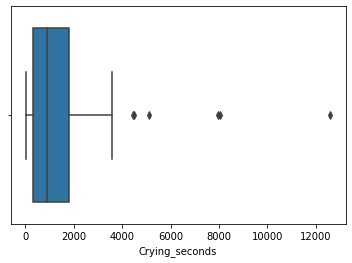

In [405]:
# finding outlier
sns.boxplot(x='Crying_seconds',data=df)

C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([49., 14.,  4.,  2.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([   25. ,  1282.5,  2540. ,  3797.5,  5055. ,  6312.5,  7570. ,
         8827.5, 10085. , 11342.5, 12600. ]),
 <a list of 10 Patch objects>)

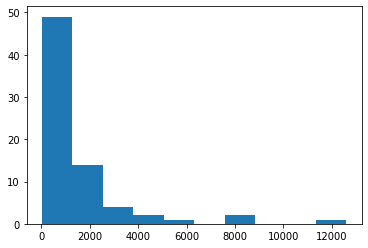

In [406]:
plt.hist(x='Crying_seconds',data=df)

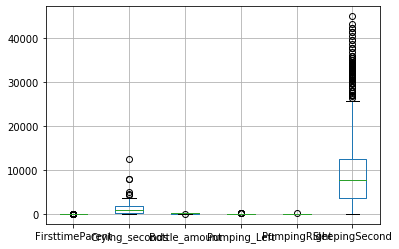

In [407]:
#finding outliears
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE7328B248>,
      dtype=object)

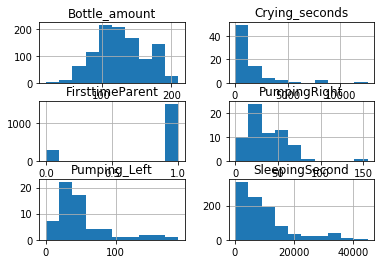

In [408]:
#major data is left skewed
df.hist()

# Filling blank columns with mean median mode

In [409]:
def impute_median(series):
    return series.fillna(series.median())

In [410]:
df.Crying_seconds=df['Crying_seconds'].transform(impute_median)
df.SleepingSecond=df['SleepingSecond'].transform(impute_median)
df.Pumping_Left=df['Pumping_Left'].transform(impute_median)
df.PumpingRight=df['PumpingRight'].transform(impute_median)

In [411]:
df['Bottle_amount'] = df['Bottle_amount'].fillna(df['Bottle_amount'].mode()[0])

In [412]:
df.isnull().sum()

BabyId             0
FirsttimeParent    0
Crying_date        0
Crying_time        0
Crying_seconds     0
Feeding_date       0
Feeding_time       0
Bottle_amount      0
PumpingDate        0
PumpingTime        0
Pumping_Left       0
PumpingRight       0
SleepingDate       0
SleepingTime       0
SleepingSecond     0
dtype: int64

# Perform feature engineering

In [413]:
df.head()

,BabyId,FirsttimeParent,Crying_date,Crying_time,Crying_seconds,Feeding_date,Feeding_time,Bottle_amount,PumpingDate,PumpingTime,Pumping_Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,40.0,32.5,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,40.0,32.5,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,40.0,32.5,2015-08-06,12:15:00,4800.000000


In [414]:
df.FirsttimeParent.replace((1,0),('Yes','No'),inplace =True)

In [415]:
df.FirsttimeParent.value_counts(normalize=True)

Yes    0.840948
No     0.159052
Name: FirsttimeParent, dtype: float64

In [416]:
def sample(Yes, n=1000):
    return pd.DataFrame({'FirsttimeParent':np.where(np.random.rand(n)<Yes,'Yes','No')})
    

In [417]:
dist =pd.DataFrame({'Yes':[sample(0.50,1000).FirsttimeParent.value_counts(normalize=True)['Yes'] for i in range(1000)]})

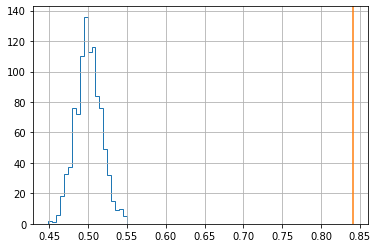

In [418]:
dist.Yes.hist(histtype='step',bins=20)
plt.rcParams['figure.figsize']=15,8
plt.axvline(0.840948,c='C1')

In [419]:
100-scipy.stats.percentileofscore(dist.Yes,0.511)

25.599999999999994

In [420]:
#conclution: p-value is less than significance level,rejected null-hypothesis. 

# Analyze and visualize the data

In [421]:
df['BabyId'].unique()

array(['HPT2_NR_16', 'HPT2_NR_17', 'HPT2_NR_18', 'HPT2_NR_19',
       'HPT2_NR_20', 'HPT2_NR_21', 'HPT2_NR_22', 'HPT2_NR_23',
       'HPT2_NR_24', 'HPT2_NR_25', 'HPT2_NR_26', 'HPT2_NR_27',
       'HPT2_NR_28', 'HPT2_NR_29', 'HPT2_NR_30', 'HPT2_NR_31',
       'HPT2_NR_33'], dtype=object)

# Total percentage of FirsttimeParent

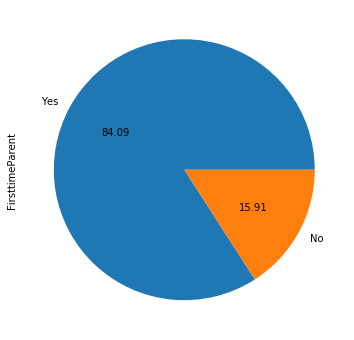

In [422]:
df['FirsttimeParent'].value_counts()
df['FirsttimeParent'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')

# 84.09 % of parents are first time parents which greater than the once who are going to be parent of second child

In [423]:
#extraxting date
#Crying_date,PumpingDate,Feeding_date is same 
df['day']=df['Crying_date'].dt.day

In [424]:
df.head()

,BabyId,FirsttimeParent,Crying_date,Crying_time,Crying_seconds,Feeding_date,Feeding_time,Bottle_amount,PumpingDate,PumpingTime,Pumping_Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,day
0,HPT2_NR_16,Yes,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043,5
1,HPT2_NR_16,Yes,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960,5
2,HPT2_NR_16,Yes,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,40.0,32.5,2015-08-06,10:20:00,2100.000000,6
3,HPT2_NR_16,Yes,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,40.0,32.5,2015-08-06,11:30:00,1200.000000,6
4,HPT2_NR_16,Yes,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,40.0,32.5,2015-08-06,12:15:00,4800.000000,6


# Compared Day-wise crying seconds of baby

In [425]:
df_day = df.groupby('day').count()['Crying_seconds'].reset_index()

Text(0.5, 0, 'day')

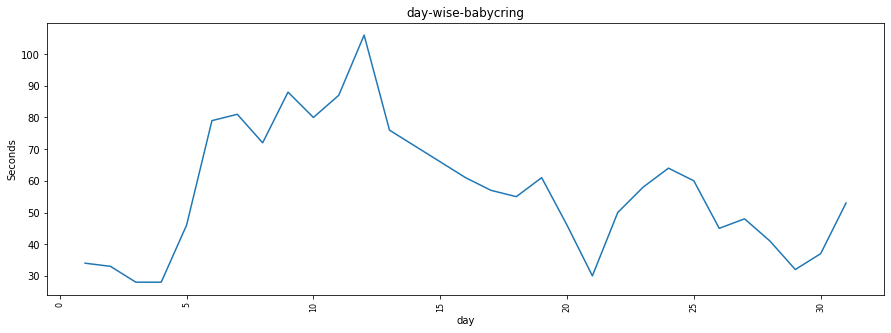

In [426]:
plt.figure(figsize=[15,5])
plt.plot(df_day['day'],df_day['Crying_seconds'])
plt.xticks(rotation = 'vertical',size=8)

plt.title('day-wise-babycring')
plt.ylabel('Seconds')
plt.xlabel('day')

12th day the maximum seconds babies have cried

# Compared few  BabyId to check which day most them have cried

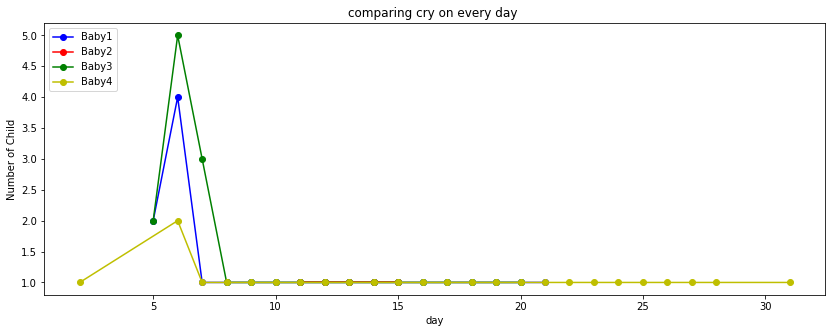

In [427]:
plt.figure(figsize=(14,5))

df.loc[df['BabyId']=='HPT2_NR_16'].groupby('day')['Crying_seconds'].nunique().plot(color='b',marker='o',label='Baby1')
df.loc[df['BabyId']=='HPT2_NR_17'].groupby('day')['Crying_seconds'].nunique().plot(color='r',marker='o',label='Baby2')
df.loc[df['BabyId']=='HPT2_NR_18'].groupby('day')['Crying_seconds'].nunique().plot(color='g',marker='o',label='Baby3')
df.loc[df['BabyId']=='HPT2_NR_19'].groupby('day')['Crying_seconds'].nunique().plot(color='y',marker='o',label='Baby4')

plt.ylabel("Number of Child")
plt.legend(loc='upper left')
plt.title("comparing cry on every day ")
plt.grid(False)

From the graph it can bee seen that 6th day babies have cried the most

# Comparassion of Baby-ID and total amount spend on bottle

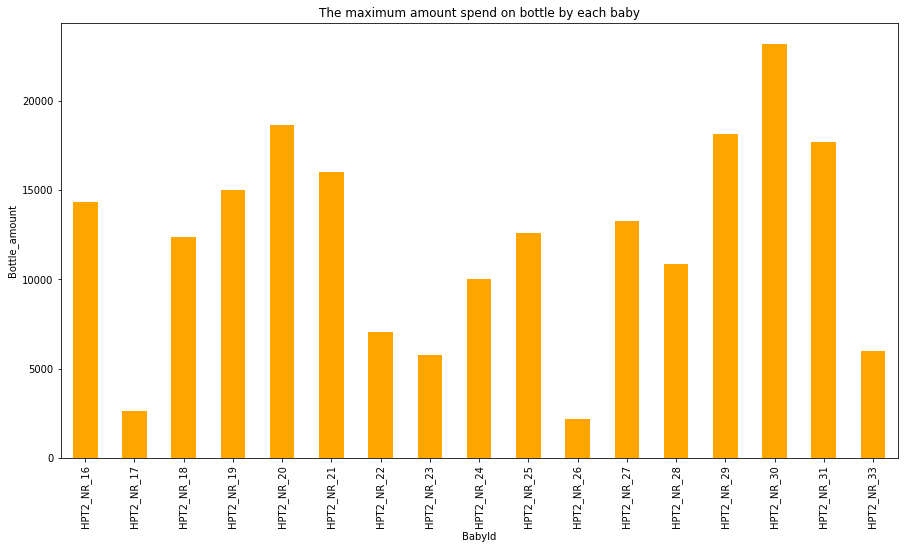

In [428]:
df.groupby('BabyId')['Bottle_amount'].sum().plot(kind='bar', color = 'orange');
plt.title("The maximum amount spend on bottle by each baby")
plt.ylabel('Bottle_amount')
plt.rcParams['figure.figsize']=(10,8)
plt.xlabel('BabyId');

HPT2_NR_30 has spend maximum amount for bottle

# Comparing babyId and sleep take seconds-wise

Text(0.5, 0, 'BabyId')

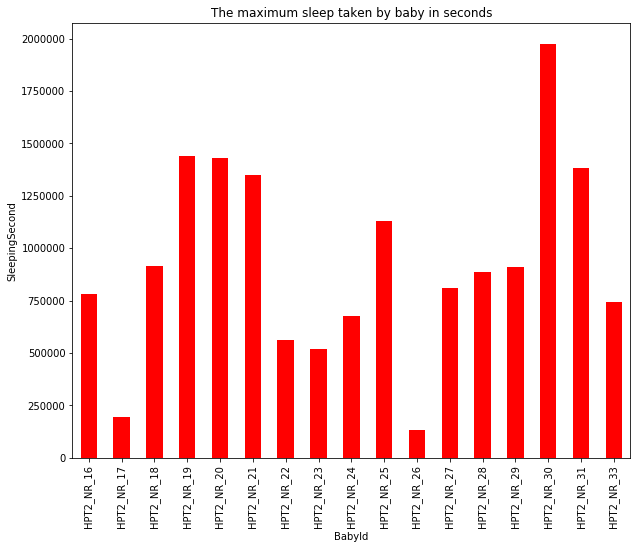

In [429]:
df.groupby('BabyId')['SleepingSecond'].sum().plot(kind='bar', color = 'red');
plt.title("The maximum sleep taken by baby in seconds")
plt.ylabel('SleepingSecond')
plt.rcParams['figure.figsize']=(10,8)
plt.xlabel('BabyId')

HPT2_NR_30  maximum sleep taken

# Which parents have second baby?

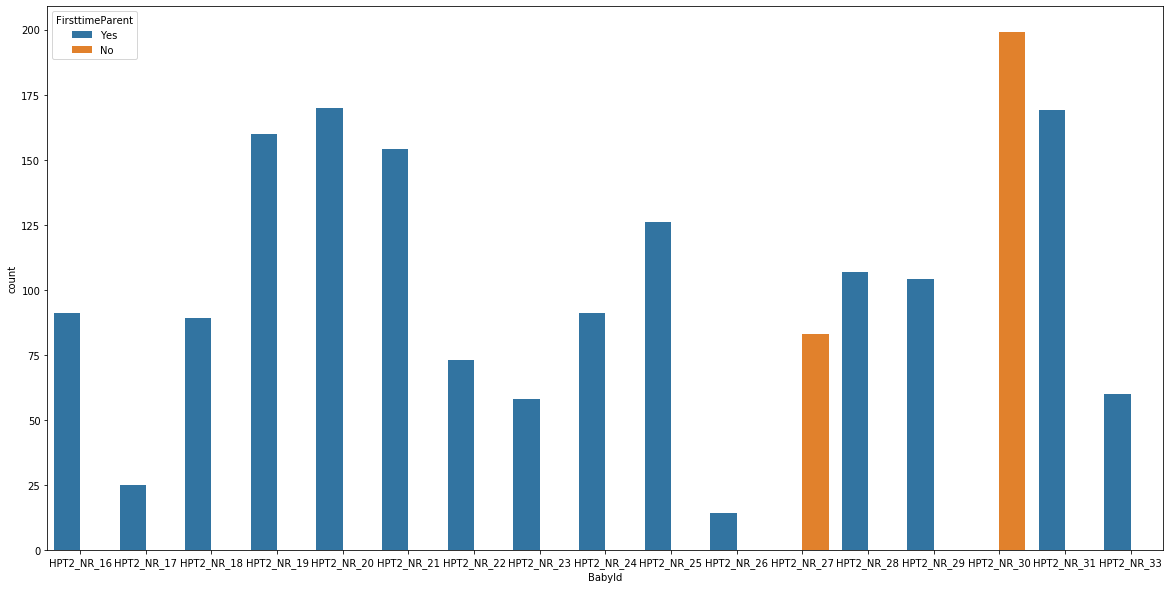

In [430]:
plt.figure(figsize=(20,10))

plt.xticks(size = 10)
sns.countplot(x='BabyId', hue = 'FirsttimeParent', data=df);

Babies ID HPT2_NR_30 and HPT2_NR_27 their  parents are having 2nd child

# Understand the which pump utilization is more

In [431]:
pump= df[df['BabyId'].isin(["HPT2_NR_16","HPT2_NR_18","HPT2_NR_20","HPT2_NR_24","HPT2_NR_30",])]

In [432]:
pump.head()

,BabyId,FirsttimeParent,Crying_date,Crying_time,Crying_seconds,Feeding_date,Feeding_time,Bottle_amount,PumpingDate,PumpingTime,Pumping_Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,day
0,HPT2_NR_16,Yes,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043,5
1,HPT2_NR_16,Yes,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960,5
2,HPT2_NR_16,Yes,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,40.0,32.5,2015-08-06,10:20:00,2100.000000,6
3,HPT2_NR_16,Yes,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,40.0,32.5,2015-08-06,11:30:00,1200.000000,6
4,HPT2_NR_16,Yes,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,40.0,32.5,2015-08-06,12:15:00,4800.000000,6


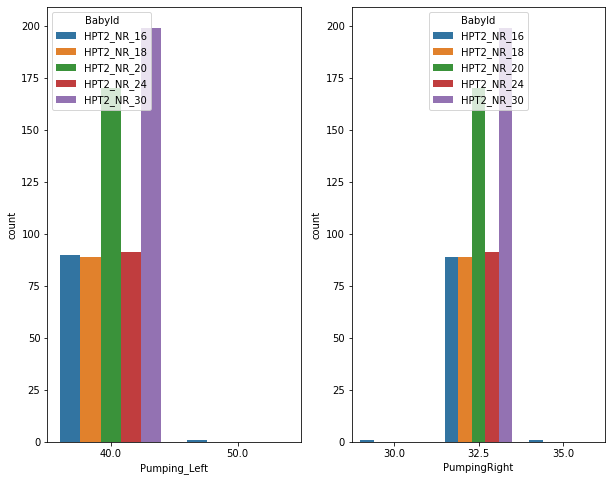

In [433]:
plt.subplot(1,2,1)
sns.countplot('Pumping_Left',hue='BabyId',data=pump)

plt.subplot(1,2,2)
sns.countplot('PumpingRight',hue='BabyId',data=pump)

Compared few babyid to decide which side pump has been utlized more,so according to the chart its eqally utized

# Comparing sleep time daywise

In [434]:
sl_day = df.groupby('day').count()['SleepingSecond'].reset_index()

Text(0.5, 0, 'day')

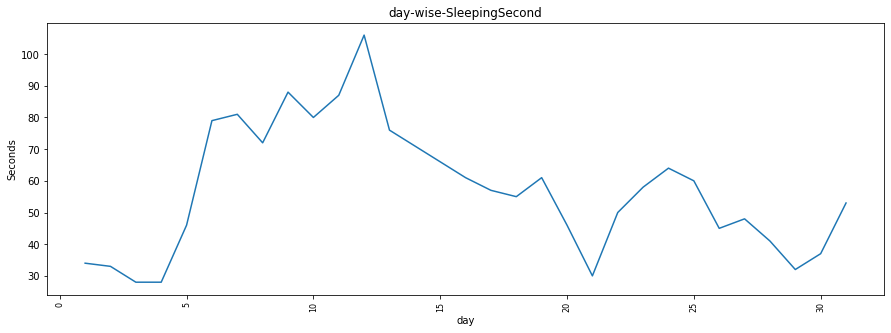

In [435]:
plt.figure(figsize=[15,5])
plt.plot(sl_day['day'],sl_day['SleepingSecond'])
plt.xticks(rotation = 'vertical',size=8)

plt.title('day-wise-SleepingSecond')
plt.ylabel('Seconds')
plt.xlabel('day')

In [436]:
br = pd.read_excel('birth.xlsx')

In [437]:
br.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [438]:
br.shape

(189, 6)

In [439]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom_weight    189 non-null    int64  
 1   Mom_height    189 non-null    int64  
 2   Mom_Age       189 non-null    int64  
 3   Religion      189 non-null    int64  
 4   Gender        189 non-null    int64  
 5   Birth_Weight  189 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 9.0 KB


In [440]:
#null values
br.isnull().sum()

Mom_weight      0
Mom_height      0
Mom_Age         0
Religion        0
Gender          0
Birth_Weight    0
dtype: int64

In [441]:
br.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.232804,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.423741,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.000000,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.000000,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.000000,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.000000,3.440000
max,79.000000,189.000000,45.000000,3.000000,2.000000,4.150000


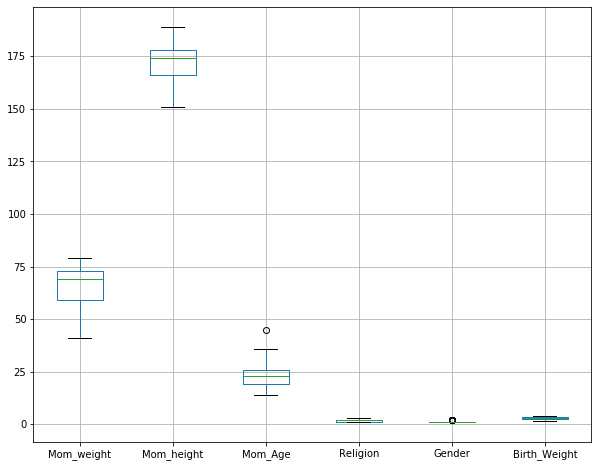

In [442]:
#finding outliears
br.boxplot() 

# Perform statistical analysis

# 2 sided test

In [443]:
br['Mom_height'].mean()

172.02645502645504

 H0:μ =3
Ha : μ ≠ 3

In [444]:
samdata= pd.DataFrame({'Mom_height':[np.argsort(np.random.random(1000))[:70]]})

In [445]:
meansamdata =samdata.mean()
hypMean =170
N=70
standPop =np.std(br['Mom_height'])

In [446]:
(meansamdata-hypMean)/(standPop/math.sqrt(N))

Mom_height    35.50483
Name: 0, dtype: float64

-2.8 < crutical value 1.96
Rejecting null hypothesis

# Analyze and visualize the data

# Gender of babieds born

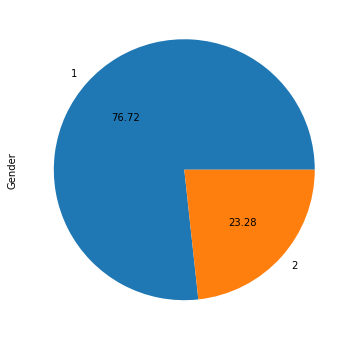

In [452]:
br['Gender'].value_counts()
br['Gender'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')

 considering male = 1 and female = 2. 
    Female baby born is more comapred to boy
    

# comparing babies weight on the bases of gender

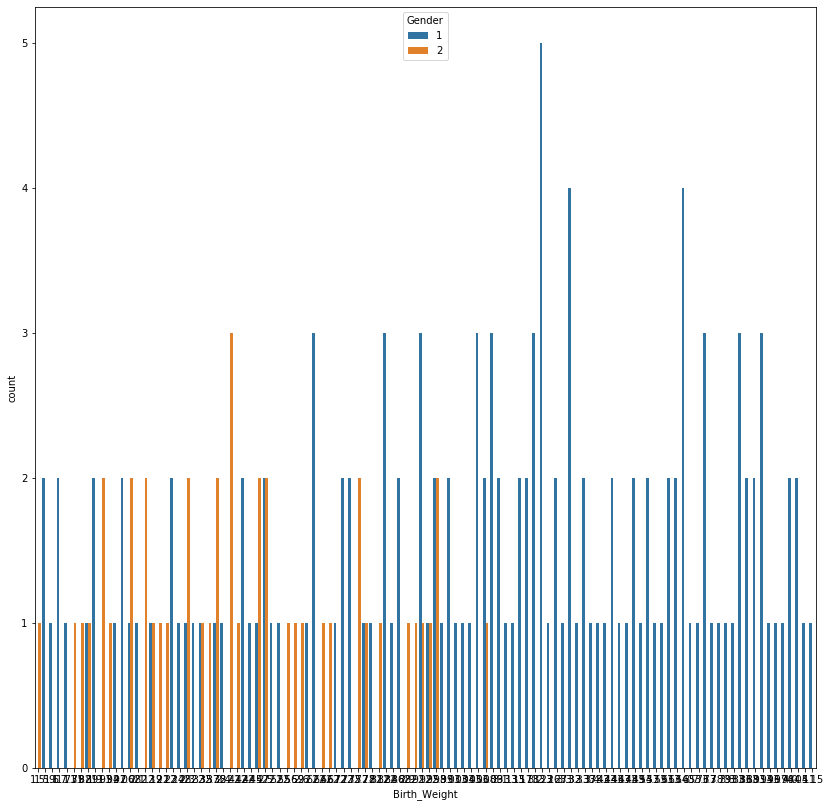

In [468]:
plt.figure(figsize=(14,14))
sns.countplot(x='Birth_Weight', hue = 'Gender', data=br);

maximum weigh of a boy is greater than 4kg and of a girl is 3 kg at the time of birth

# Total distribution of religion 

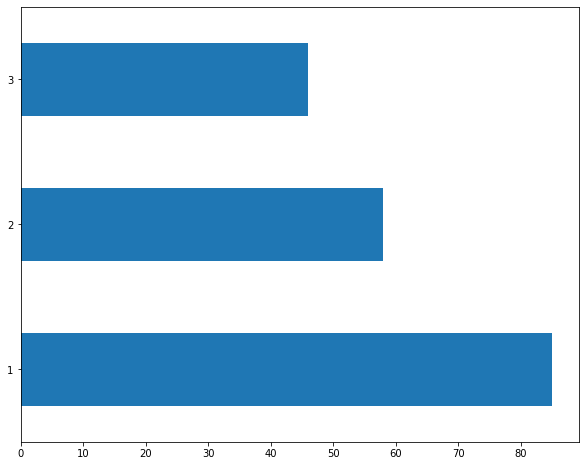

In [454]:
br.Religion.value_counts().plot(kind='barh')

Considering Religion hindu=1,muslim=2  christianity=3


# Average weight of babies 

In [469]:
br['Birth_Weight'].mean()

2.936507936507936

# Age of Mother's at the time of birth

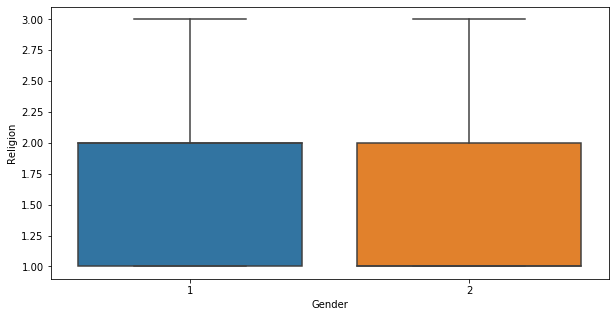

In [456]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="Gender", y="Religion", data=br)

Average of birth weight of babies are  around 2.93

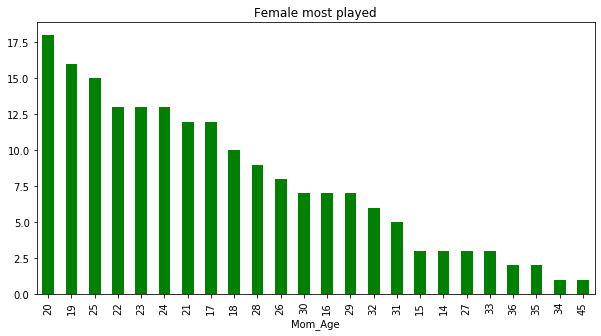

In [457]:
br['Mom_Age'].value_counts().plot(kind='bar',color='green')
plt.title("Female most played")
plt.rcParams['figure.figsize']=(10,8)
plt.xlabel('Mom_Age');

In [458]:
print(max(br.Mom_Age))

45


In [459]:
print(min(br.Mom_Age))

14


The maximum mother  was of age 20 at the time of delivery

# Regression model

In [460]:
X= br['Mom_weight'].values
Y=br['Mom_height'].values

In [461]:
Mean_x =np.mean(X)
Mean_y =np.mean(Y)

n =len(X)

numer= 0
denom = 0
for i in range(n):
    numer +=(X[i]-Mean_x) * (Y[i]-Mean_y)
    denom += (X[i]-Mean_x) ** 2
b1 =numer /denom
b0 = Mean_y - (b1 * Mean_x)

print(b1,b0)

0.4842475091113488 140.50681027995867


b1=0.48,
b2=140

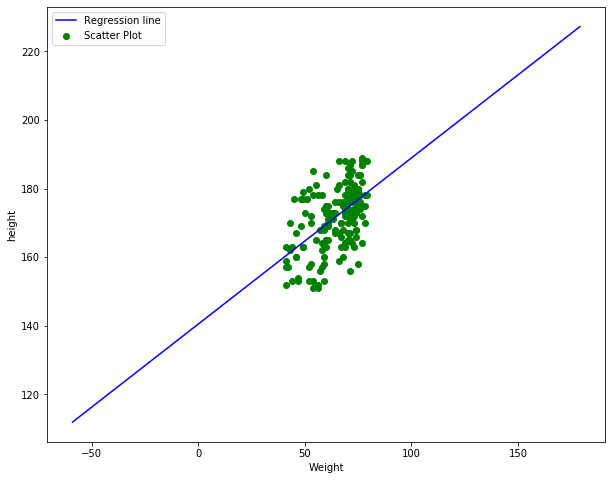

In [462]:
max_x =np.max(X) + 100
min_x =np.min(X) -100
# calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y= b0 + b1 * x

#plotting line
plt.plot(x,y,color='b',label = 'Regression line')
#plotting scatter points
plt.scatter(X,Y,color='g',label='Scatter Plot')

plt.xlabel('Weight')
plt.ylabel('height')
plt.legend()
plt.show()

In [463]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X= X.reshape((n,1))
reg =LinearRegression()
reg=reg.fit(X,Y)
Y_pred = reg.predict(X)
r2_score =reg.score(X,Y)
print(r2_score)

0.28897096092403995


In [464]:
X= br['Mom_weight'].values
Y=br['Birth_Weight'].values

In [465]:
Mean_x =np.mean(X)
Mean_y =np.mean(Y)

n =len(X)

numer= 0
denom = 0
for i in range(n):
    numer +=(X[i]-Mean_x) * (Y[i]-Mean_y)
    denom += (X[i]-Mean_x) ** 2
b1 =numer /denom
b0 = Mean_y - (b1 * Mean_x)

print(b1,b0)

0.05185354470000548 -0.4386365444416267


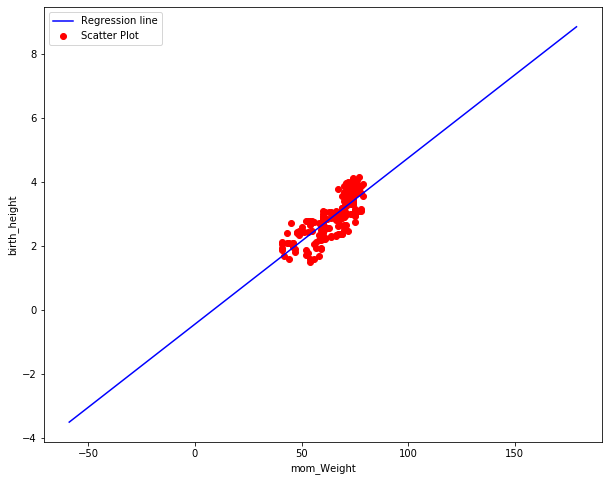

In [466]:
max_x =np.max(X) + 100
min_x =np.min(X) -100
# calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y= b0 + b1 * x

#plotting line
plt.plot(x,y,color='b',label = 'Regression line')
#plotting scatter points
plt.scatter(X,Y,color='r',label='Scatter Plot')

plt.xlabel('mom_Weight')
plt.ylabel('birth_height')
plt.legend()
plt.show()

In [467]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X= X.reshape((n,1))
reg =LinearRegression()
reg=reg.fit(X,Y)
Y_pred = reg.predict(X)
r2_score =reg.score(X,Y)
print(r2_score)

0.6401936893720652
